<a href="https://www.kaggle.com/code/amaninaman/gridsearchcv-decisiontree-on-bank-churn-dataset?scriptVersionId=158270312" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e1/sample_submission.csv
/kaggle/input/playground-series-s4e1/train.csv
/kaggle/input/playground-series-s4e1/test.csv


# (1) IMPORTING THE DATASET


In [2]:
df=pd.read_csv("/kaggle/input/playground-series-s4e1/train.csv",parse_dates=True)
df.head(35)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
5,5,15771669,Genovese,588,Germany,Male,36.0,4,131778.58,1,1.0,0.0,136024.31,1
6,6,15692819,Ch'ang,593,France,Female,30.0,8,144772.69,1,1.0,0.0,29792.11,0
7,7,15669611,Chukwuebuka,678,Spain,Male,37.0,1,138476.41,1,1.0,0.0,106851.60,0
8,8,15691707,Manna,676,France,Male,43.0,4,0.00,2,1.0,0.0,142917.13,0
9,9,15591721,Cattaneo,583,Germany,Male,40.0,4,81274.33,1,1.0,1.0,170843.07,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


<Axes: >

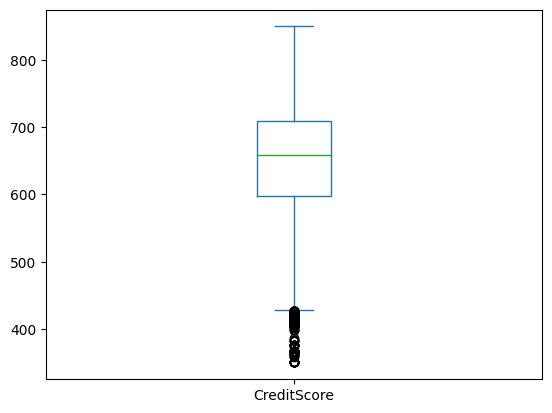

In [4]:
df['CreditScore'].plot(kind="box")

In [5]:
df['CreditScore'].describe()

count    165034.000000
mean        656.454373
std          80.103340
min         350.000000
25%         597.000000
50%         659.000000
75%         710.000000
max         850.000000
Name: CreditScore, dtype: float64

# (2) HISTOGRAM FOR CREDIT SCORE

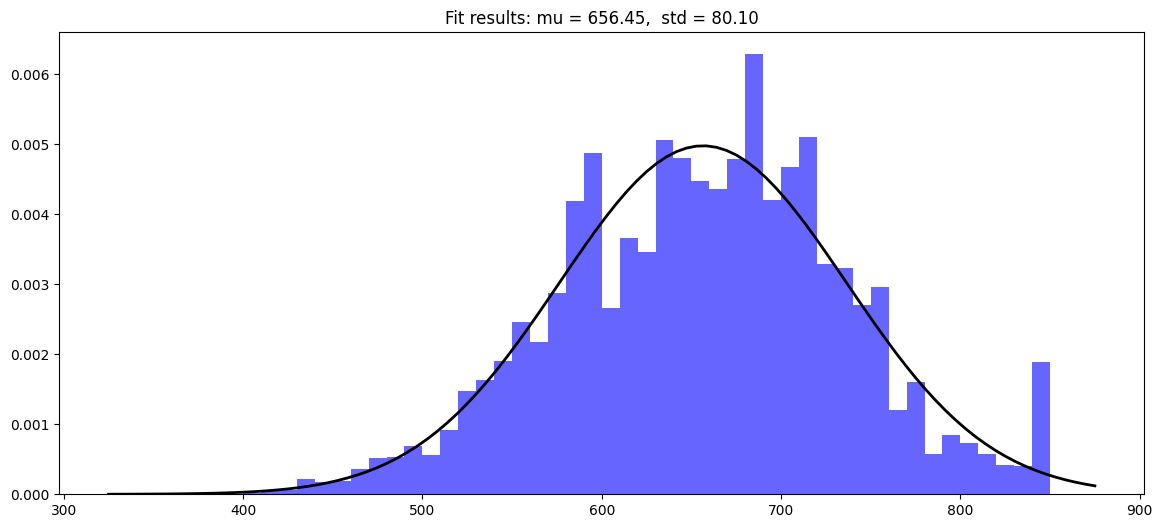

In [6]:
from scipy import stats

# Fit a normal distribution to the data
mu, sigma = stats.norm.fit(df['CreditScore'])

# Plot the histogram
plt.subplots(figsize=(14, 6))
n, bins, patches = plt.hist(df['CreditScore'], bins=50, density=True, alpha=0.6, color='b')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)

title = "Fit results: mu = %.2f,  std = %.2f" % (mu, sigma)
plt.title(title)

plt.show()

<Axes: ylabel='Frequency'>

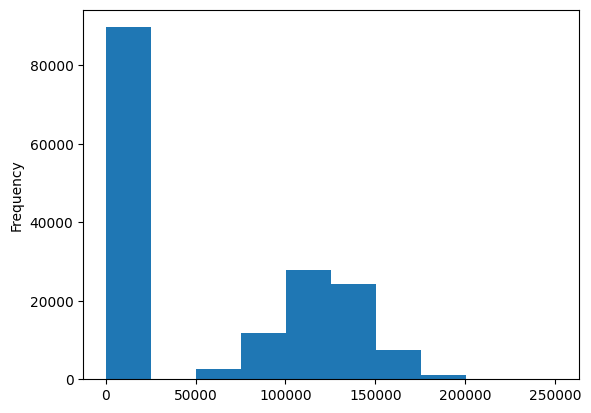

In [7]:
df['Balance'].plot(kind="hist")

In [8]:
df['Balance'].loc[df['Balance']==0].value_counts()

Balance
0.0    89648
Name: count, dtype: int64

<Axes: xlabel='Geography'>

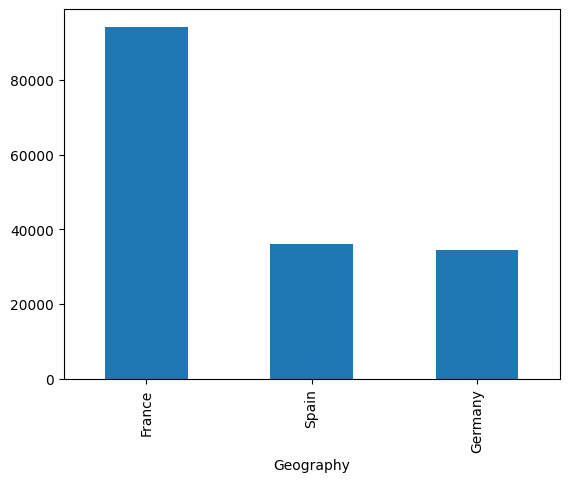

In [9]:
df['Geography'].value_counts().plot(kind="bar")

In [10]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [11]:
df['Tenure'].value_counts()

Tenure
2     18045
7     17810
4     17554
8     17520
5     17268
1     16760
9     16709
3     16630
6     15822
10     5909
0      5007
Name: count, dtype: int64

In [12]:
df['NumOfProducts'].value_counts()

NumOfProducts
2    84291
1    77374
3     2894
4      475
Name: count, dtype: int64

Text(0.5, 1.0, 'Credit Card Ownership')

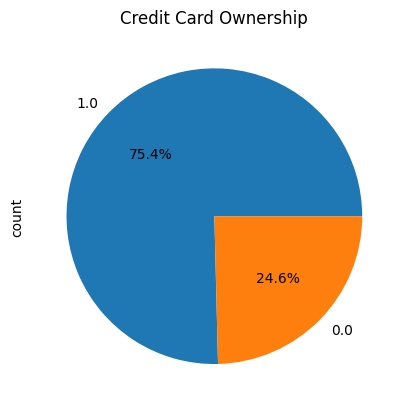

In [13]:
df['HasCrCard'].value_counts().plot(kind="pie",autopct='%1.1f%%')
plt.title("Credit Card Ownership")

Text(0.5, 1.0, 'Active Membership')

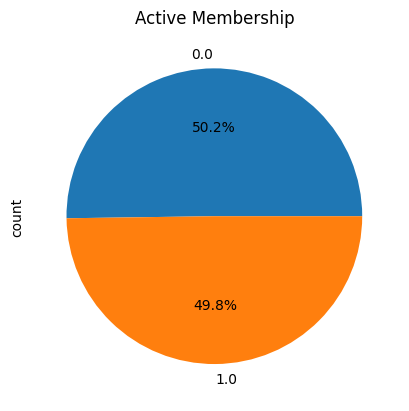

In [14]:
df['IsActiveMember'].value_counts().plot(kind="pie",autopct='%1.1f%%')
plt.title("Active Membership")

<Axes: >

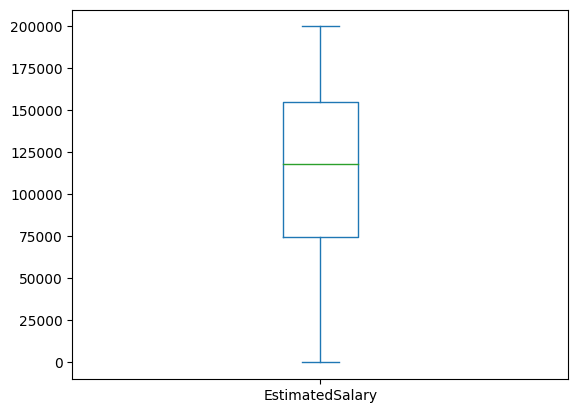

In [15]:
df['EstimatedSalary'].plot(kind="box")

<Axes: ylabel='Frequency'>

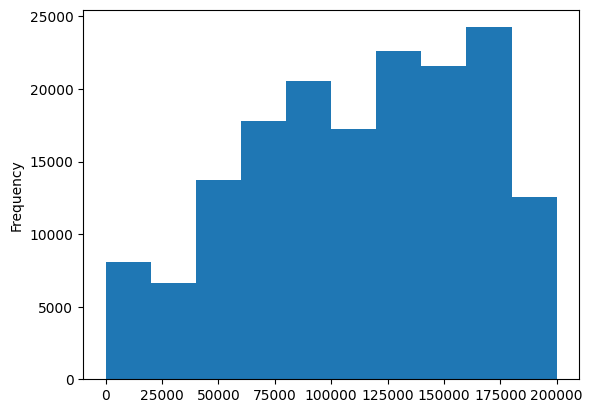

In [16]:
df['EstimatedSalary'].plot(kind="hist")

<Axes: ylabel='count'>

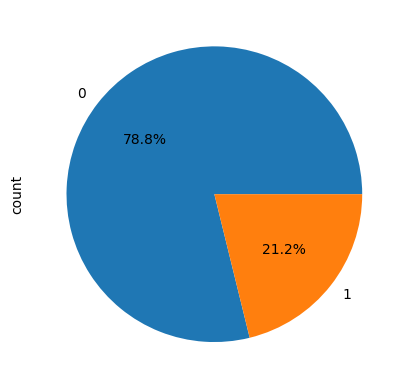

In [17]:
df['Exited'].value_counts().plot(kind="pie",autopct='%1.1f%%')

In [18]:
df.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

# (3) PREPROCESSING FOR TRAIN.CSV

In [19]:
df=df[['CreditScore','Geography','Gender','Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited']]
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [20]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [21]:
df.loc[:,'Geography']

0         France
1         France
2         France
3         France
4          Spain
           ...  
165029     Spain
165030    France
165031    France
165032     Spain
165033    France
Name: Geography, Length: 165034, dtype: object

In [22]:
df.tail()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
165029,667,Spain,Female,33.0,2,0.0,1,1.0,1.0,131834.75,0
165030,792,France,Male,35.0,3,0.0,1,0.0,0.0,131834.45,0
165031,565,France,Male,31.0,5,0.0,1,1.0,1.0,127429.56,0
165032,554,Spain,Female,30.0,7,161533.0,1,0.0,1.0,71173.03,0
165033,850,France,Male,31.0,1,0.0,1,1.0,0.0,61581.79,1


In [23]:
from sklearn import preprocessing

Geo_Code = preprocessing.LabelEncoder()
Geo_Code.fit(['France','Spain','Germany'])
df.loc[:,'Geography']=Geo_Code.transform(df.loc[:,'Geography'])


Gender_Code=preprocessing.LabelEncoder()
Gender_Code.fit(['Male','Female'])
df.loc[:,'Gender']=Gender_Code.transform(df.loc[:,'Gender'])
df.head(35)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83,0
5,588,1,1,36.0,4,131778.58,1,1.0,0.0,136024.31,1
6,593,0,0,30.0,8,144772.69,1,1.0,0.0,29792.11,0
7,678,2,1,37.0,1,138476.41,1,1.0,0.0,106851.60,0
8,676,0,1,43.0,4,0.00,2,1.0,0.0,142917.13,0
9,583,1,1,40.0,4,81274.33,1,1.0,1.0,170843.07,0


In [24]:
df['Gender']=pd.Series(df['Gender'],dtype="int64")
df['Geography']=pd.Series(df['Geography'],dtype="int64")

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  int64  
 2   Gender           165034 non-null  int64  
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 13.9 MB


In [26]:
df.iloc[:,0:10]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97
1,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50
2,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69
3,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88
4,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83
...,...,...,...,...,...,...,...,...,...,...
165029,667,2,0,33.0,2,0.00,1,1.0,1.0,131834.75
165030,792,0,1,35.0,3,0.00,1,0.0,0.0,131834.45
165031,565,0,1,31.0,5,0.00,1,1.0,1.0,127429.56
165032,554,2,0,30.0,7,161533.00,1,0.0,1.0,71173.03


# (4) NORMALIZATION FOR TRAIN.CSV

In [27]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df.iloc[:,0:10])

df_train= scaler.transform(df.iloc[:,0:10])


In [28]:
df_target=df.iloc[:,10]

# (5) SPLITTING THE TRAIN.CSV DATA INTO TRAIN AND TEST SETS

In [29]:
from sklearn.model_selection import train_test_split
X=df_train
y=df_target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=78, stratify=y)
#stratify dengesiz setlerde hedef nitelik dağılımnıı göz önüne alarak train test ayırmı yapıyor. dengesiz setler için kullanışlı. yoksa tüm train veya test egemen sınıftan seçilebiliyor!

print('X_train.shape=', X_train.shape, 'Y_train.shape=', y_train.shape)
print('X_test.shape=', X_test.shape, 'Y_test.shape=', y_test.shape)

X_train.shape= (115523, 10) Y_train.shape= (115523,)
X_test.shape= (49511, 10) Y_test.shape= (49511,)


# (6) TRAINING A DRAFT MODEL

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.class_weight import compute_sample_weight


w_train=compute_sample_weight('balanced',y_train)

DT_model=DecisionTreeClassifier(random_state=34)


DT_model.fit(X_train,y_train,sample_weight=w_train)


DecisionTreeClassifier(random_state=34)

# (7) GRIDSEARCHCV FOR GETTING BEST PARAMETERS with 10-FOLD CROSS VALIDATION

In [31]:
from sklearn.model_selection import GridSearchCV
parameters_to_check={
    "criterion":['gini','entropy'],
    "max_depth":range(1,5),
    "min_samples_split":range(2,10),
    "min_samples_leaf":range(1,5),
    "max_features":range(1,10)
    
}


grid = GridSearchCV(DT_model,
                   param_grid=parameters_to_check,
                   cv=10,
                   verbose=1,
                   n_jobs=-1,
                   return_train_score=True)

grid.fit(X_train,y_train)

Fitting 10 folds for each of 2304 candidates, totalling 23040 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=34),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 5), 'max_features': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 10)},
             return_train_score=True, verbose=1)

In [32]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

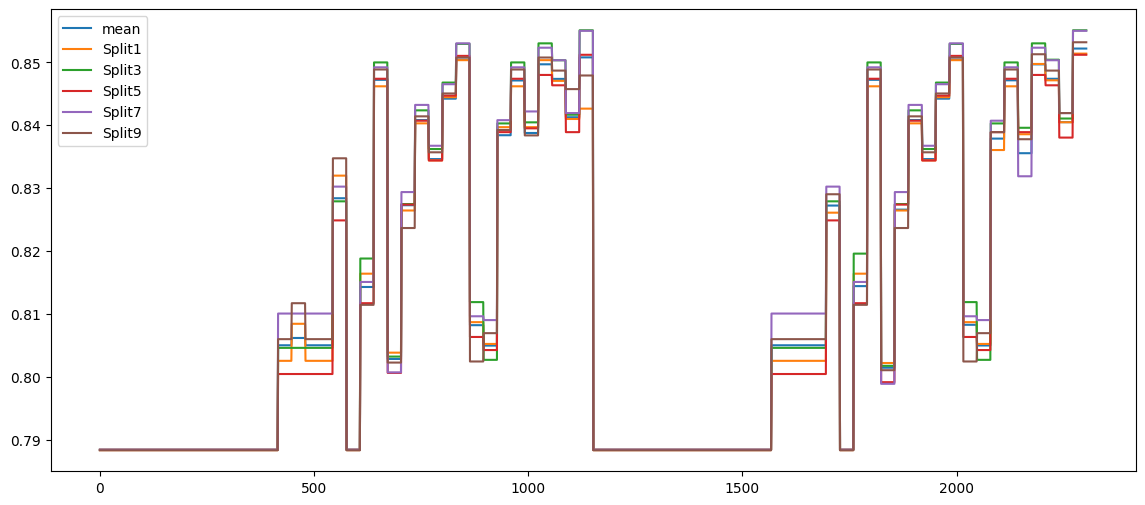

In [33]:
plt.figure(figsize=(14,6))
plt.plot(np.array(grid.cv_results_["mean_test_score"]))
plt.plot(np.array(grid.cv_results_["split1_test_score"]))

plt.plot(np.array(grid.cv_results_["split3_test_score"]))

plt.plot(np.array(grid.cv_results_["split5_test_score"]))

plt.plot(np.array(grid.cv_results_["split7_test_score"]))

plt.plot(np.array(grid.cv_results_["split9_test_score"]))

plt.legend(["mean","Split1","Split3","Split5","Split7","Split9"])


# (8) TRAINING THE MODEL WITH "BEST PARAMS"

In [34]:
DT_model=DecisionTreeClassifier(random_state=34,criterion='gini',max_depth=4,max_features=9, min_samples_leaf=1,min_samples_split=2)

DT_model.fit(X_train,y_train,sample_weight=w_train)

DecisionTreeClassifier(max_depth=4, max_features=9, random_state=34)

In [35]:
from sklearn.metrics import confusion_matrix
np.random.seed(36)
DT_predictions=DT_model.predict(X_test)
np.random.seed(36)
DT_probabilities = DT_model.predict_proba(X_test)[:,1]

Prediction_Column=np.array([],dtype=int)
Probability_Column=np.array([],dtype=float)

for i in range(len(X_test)):
    Prediction_Column=np.append(Prediction_Column,DT_predictions[i])
    Probability_Column=np.append(Probability_Column,DT_probabilities[i])
    
Prediction_Column=pd.Series(Prediction_Column,name="Predictions")
Probability_Column=pd.Series(Probability_Column,name="Probabilities")
Results_DF= pd.concat([Prediction_Column, Probability_Column], axis=1)

cm = confusion_matrix(y_test, DT_predictions)
print("COnfusion matrix : \n",cm)
Results_DF.head(15)

COnfusion matrix : 
 [[31494  7541]
 [ 2637  7839]]


,Predictions,Probabilities
0,0,0.068393
1,0,0.068393
2,1,0.673022
3,0,0.485712
4,1,0.844182
5,0,0.068393
6,1,0.798787
7,1,0.673022
8,0,0.068393
9,0,0.257344


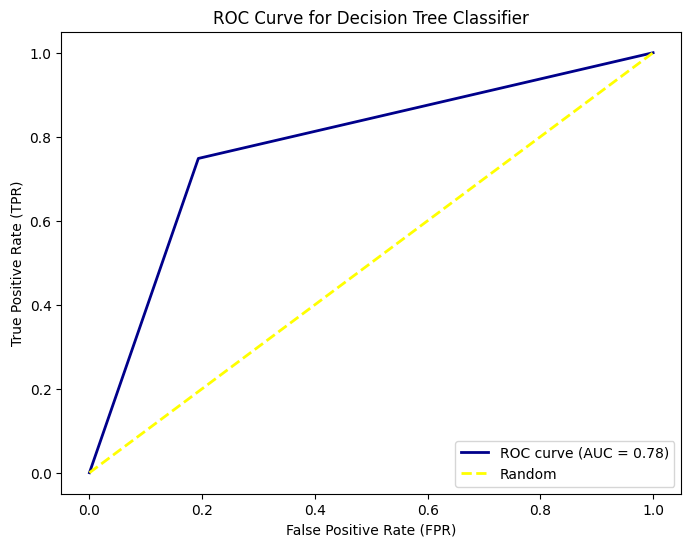

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, DT_predictions)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkblue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='yellow', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc='lower right')
plt.show()

# (9) USING THE MODEL ON TEST.CSV

In [37]:
df_test=pd.read_csv("/kaggle/input/playground-series-s4e1/test.csv")
df_test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [38]:
df_id=df_test[['id']]
df_test=df_test[['CreditScore','Geography','Gender','Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']]
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      110023 non-null  int64  
 1   Geography        110023 non-null  object 
 2   Gender           110023 non-null  object 
 3   Age              110023 non-null  float64
 4   Tenure           110023 non-null  int64  
 5   Balance          110023 non-null  float64
 6   NumOfProducts    110023 non-null  int64  
 7   HasCrCard        110023 non-null  float64
 8   IsActiveMember   110023 non-null  float64
 9   EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 8.4+ MB


In [39]:
Geo_Code_test = preprocessing.LabelEncoder()
Geo_Code_test.fit(['France','Spain','Germany'])
df_test.loc[:,'Geography']=Geo_Code_test.transform(df_test.loc[:,'Geography'])


Gender_Code_test=preprocessing.LabelEncoder()
Gender_Code_test.fit(['Male','Female'])
df_test.loc[:,'Gender']=Gender_Code_test.transform(df_test.loc[:,'Gender'])

df_test['Geography']=pd.Series(df_test['Geography'],dtype="int64")
df_test['Gender']=pd.Series(df_test['Gender'],dtype="int64")
                                    
df_test.head(35)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,586,0,0,23.0,2,0.00,2,0.0,1.0,160976.75
1,683,0,0,46.0,2,0.00,1,1.0,0.0,72549.27
2,656,0,0,34.0,7,0.00,2,1.0,0.0,138882.09
3,681,0,1,36.0,8,0.00,1,1.0,0.0,113931.57
4,752,1,1,38.0,10,121263.62,1,1.0,0.0,139431.00
5,593,0,0,22.0,9,0.00,2,0.0,0.0,51907.72
6,682,2,1,45.0,4,0.00,2,1.0,1.0,157878.67
7,539,2,0,47.0,8,0.00,2,1.0,1.0,126784.29
8,845,0,0,47.0,3,111096.91,1,1.0,0.0,94978.10
9,645,2,1,30.0,5,0.00,2,0.0,1.0,149195.44


In [40]:
scaler = StandardScaler().fit(df_test)

df_test= scaler.transform(df_test)


In [41]:
np.random.seed(37)
DT_probabilities_ = DT_model.predict_proba(df_test)[:,1]


Probability_Column_=np.array([],dtype=float)

for i in range(len(df_test)):
    
    Probability_Column_=np.append(Probability_Column_,DT_probabilities_[i])
    

Probability_Column_=pd.Series(Probability_Column_,name="Exited")
Results_DF_= pd.concat([df_id, Probability_Column_], axis=1)
Results_DF

Results_DF_.head(15)

,id,Exited
0,165034,0.068393
1,165035,0.939386
2,165036,0.068393
3,165037,0.673022
4,165038,0.673022
5,165039,0.068393
6,165040,0.257344
7,165041,0.257344
8,165042,0.939386
9,165043,0.068393


In [42]:
Results_DF_.to_csv('submission.csv', index=False)